## NN-Body Experiments

In [36]:
%load_ext autoreload
%autoreload 2
from ipywidgets import *
%matplotlib notebook
import tensorflow as tf
import numpy as np
import tqdm
import matplotlib.pyplot as plt
from IPython import display
from matplotlib import animation, rc
from IPython.display import HTML
from simulation import nbody, RK4
tf.reset_default_graph()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ImportError: No module named 'seaborn'

### RK4 Test

In [11]:
n=10
PV = tf.placeholder(tf.float32, [n*2,2])
M = tf.placeholder(tf.float32, [n])
G = tf.constant(1.0)
nbody_dif_eq = nbody(M, G=G, eps_radius=1e-4)
t, pv = RK4(nbody_dif_eq, PV, 1, h=0.01)
sess =tf.InteractiveSession()
sess.run(tf.initialize_all_variables())

100%|██████████| 99/99 [00:36<00:00,  2.90it/s]

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [95]:
# Initial conditions
mass = np.random.random(n)*10000
P0V0 = (np.random.random((n*2,2)) - 0.5)*np.array([[1,1] if i < n else [0,0] for i in range(n*2)])

pv_hist = [P0V0]
tt = 20
for t in tqdm.tqdm(range(tt)):
    pv_hist += sess.run(pv[1:], {PV: pv_hist[-1], M: mass, G:0.000001})
pv_hist= np.array(pv_hist)

100%|██████████| 20/20 [00:01<00:00, 11.64it/s]


<IPython.core.display.Javascript object>


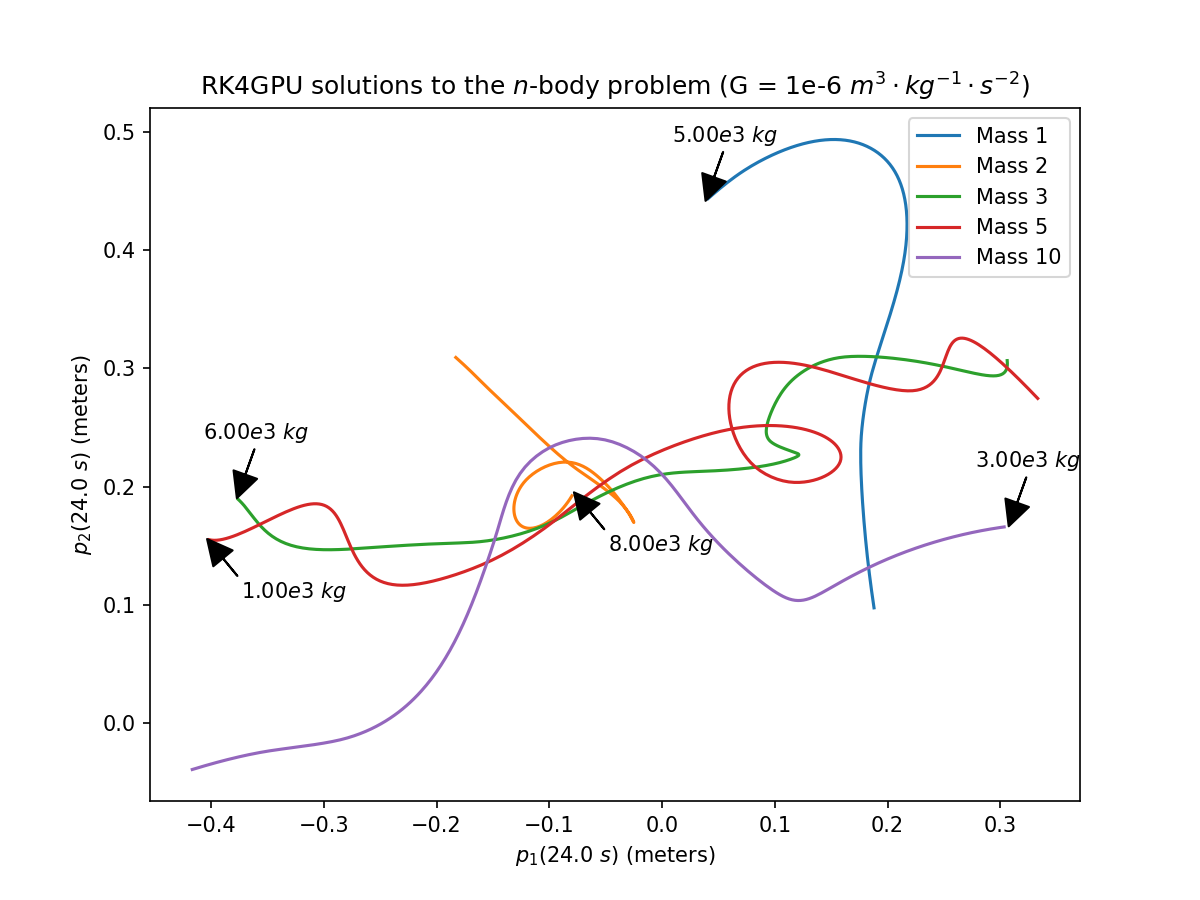

In [109]:
fig = plt.figure(figsize=(8,6))
def plot_solution(tmax=600*19):
    ax = plt.gca()
    skip = 1
    j = 0
    for i in range(10):
        if i in [5,3, 6, 7, 8]: continue
        j += 1
        plt.plot(pv_hist[:tmax:skip,i, 0],  pv_hist[:tmax:skip,i, 1], label="Mass {}".format(i+1))
        finalx, finaly = (pv_hist[tmax,i,0], pv_hist[tmax,i,1])
        ax.annotate('${:.2f}e3\ kg$'.format(mass[i]//1e3), xy=(finalx, finaly), xytext=(finalx-0.03*(-1)**(j+1), finaly +(-1)**(j+1)*0.05),
                arrowprops=dict(facecolor='black', shrink=0.001, width=0.01))
    plt.legend()
    plt.title("RK4GPU solutions to the $n$-body problem (G = 1e-6 $m^{3}\cdot kg^{−1}\cdot s^{−2}$)")
    plt.xlabel("$p_1(24.0\ s)$ (meters)")
    plt.ylabel("$p_2(24.0\ s)$ (meters)")

plot_solution(270)
#     plt.quiver(pv_hist[:tmax:skip,i, 0],  pv_hist[:tmax:skip,i, 1], 
#                pv_hist[:tmax:skip,i+3, 0],  pv_hist[:tmax:skip,i +3, 1], width=0.003)

<IPython.core.display.Javascript object>


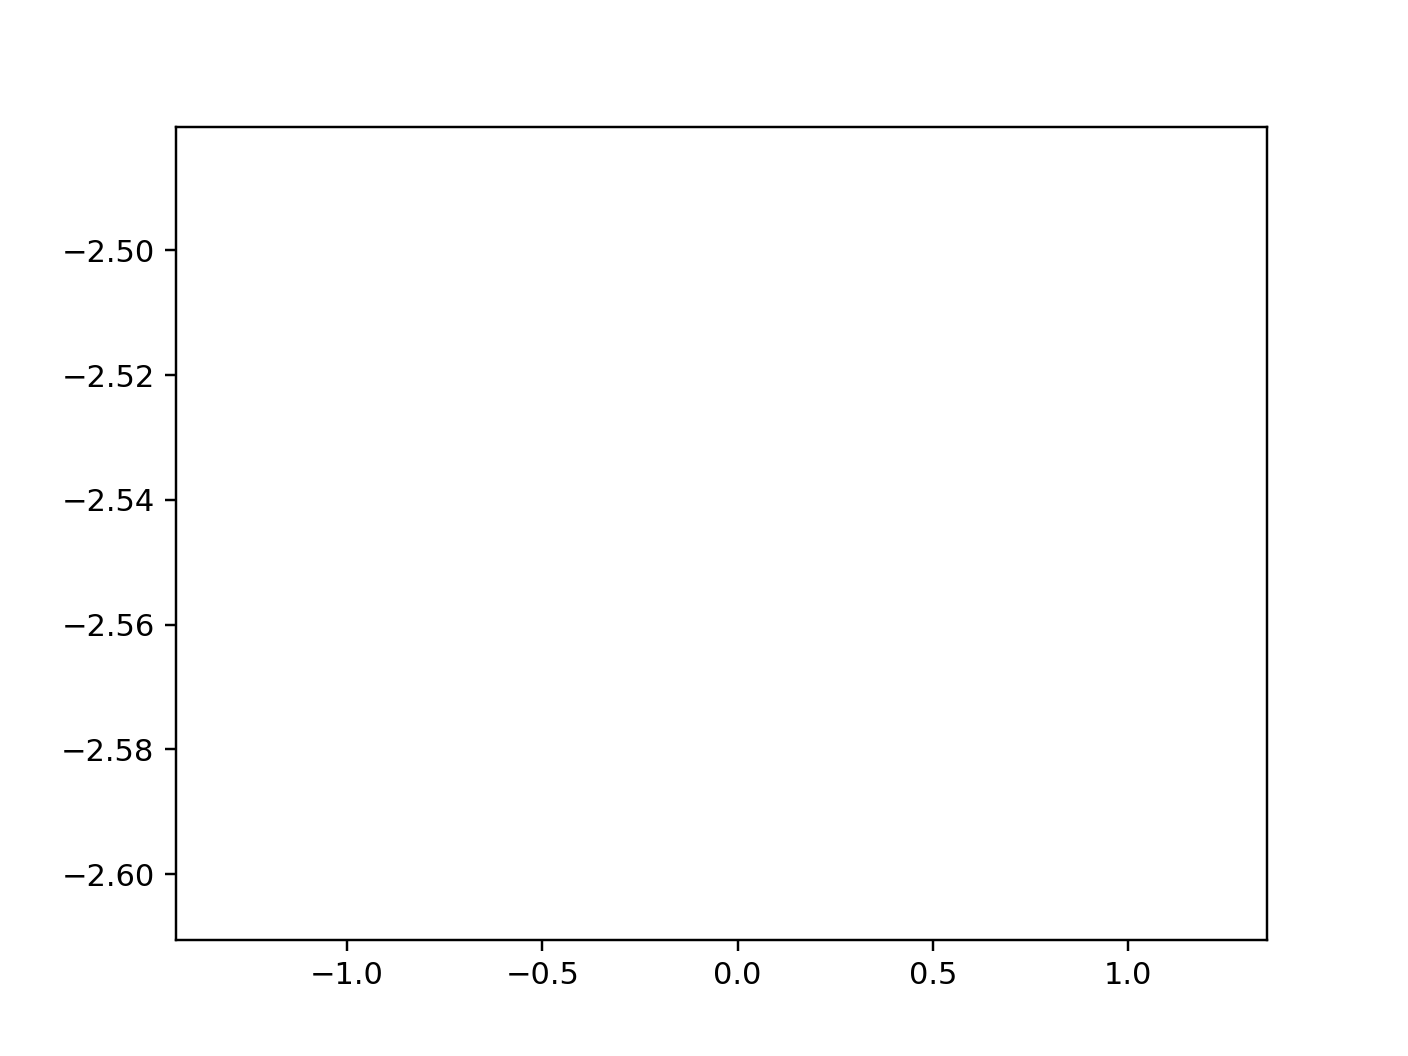

In [7]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
ax.set_xlim(( -0.5, 0.5))
ax.set_ylim((-0.5, 0.5))

plt.ion()

fig.show()
fig.canvas.draw()

for tmax in range(0,len(pv_hist), 2):
    ax.clear()
    st = max(tmax-100,0)
    for i in range(n):
        if pv_hist[tmax,i, 0]**2 + pv_hist[tmax,i, 1]**2 <= 8:
            ax.plot(pv_hist[st:tmax,i, 0],  pv_hist[st:tmax,i, 1], label="Mass {}".format(i+1))
    fig.canvas.draw()
    


In [23]:
tf.reset_default_graph()
sess =tf.InteractiveSession()


x = tf.placeholder(tf.float32, [1])
y = x*10


z = tf.log(x)
y_ph = tf.placeholder_with_default(y, [1])
w = y_ph*z

print(sess.run(y, {x: [10]}))
print(sess.run(y, {x: [10], y:[250]}))

[ 100.]
[ 250.]


In [24]:
a = tf.gradients(w,x)
b = tf.gradients(w, y_ph)
c = tf.gradients(y, x, b)

In [37]:
sess.run({'b': {'a': [{'a': a},b]}}, {x: [1]})

{'b': {'a': [{'a': [array([ 10.], dtype=float32)]},
   [array([ 0.], dtype=float32)]]}}

In [40]:
class B:
    def __init__(self,a):
        self.a= a
        
bb =B(a)

In [45]:
sess.run(bb.__dict__, {x: [1]})

{'a': [array([ 10.], dtype=float32)]}